# Python Project - Marvel Mart
# Valentina Bernal
# March 13, 2022

# Part 1: Cleaning the Data

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [254]:
# Opening and reading the file with the data needed

mmSales = pd.read_csv('Data Samples/MM_Sales.csv')

In [255]:
# Testing for the missing country values first 

print("Shape will display the rows, columns and count gives us the amount of data in each column. Data count should match with number 5000\n")

print(mmSales.shape)
print(mmSales.count())

Shape will display the rows, columns and count gives us the amount of data in each column. Data count should match with number 5000

(50000, 14)
Region            50000
Country           50000
Item Type         49994
Sales Channel     50000
Order Priority    49985
Order Date        50000
Order ID          50000
Ship Date         50000
Units Sold        50000
Unit Price        50000
Unit Cost         50000
Total Revenue     50000
Total Cost        50000
Total Profit      50000
dtype: int64


In [256]:
# Displaying a clearer view of the missing values with the function isna 
# Country and Order ID still display 0 

print( "The only two columns in which we are missing values are Order Priority and Item Type:\n")

missingValues = mmSales.isna().sum()
print(missingValues)
print("\nWe are missing 15 values in Order Priority column and 6 in Item Type column")

The only two columns in which we are missing values are Order Priority and Item Type:

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

We are missing 15 values in Order Priority column and 6 in Item Type column


In [257]:
# The datatype for each column displayed shows us that 'object' defines most of the columns we need to clean

print("Displaying the data types for all columns:\n")
print(mmSales.dtypes)

Displaying the data types for all columns:

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID           object
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object


In [258]:
print("Creating a copy of our clean CSV file.\n")
mmSalesClean = mmSales.copy()

Creating a copy of our clean CSV file.



In [259]:
''' Cleaning the data from Order ID column which we know has no missing data, but could still have an 
erroneous piece of data. Will check by trying to convert to a float and if it does convert, it is data
that we have to clean.'''

# Loops through each row in dataframe, and each row has an index which saves as a series (like a list) columns as 0, 1, 2... as each loop runs 
count = 0 
for index, row in mmSalesClean.iterrows(): 
    try: 
        
# Converting to a float and saving back to its original spot 

        row.loc['Order ID'] = float(row.loc['Order ID'])
    
    except:
        mmSalesClean.loc[int(index), 'Order ID'] = 0.0
        count += 1
            
print(f"Number of erroneous Order ID {count}")

Number of erroneous Order ID 5


In [260]:
# Replacing the missing Order Priority column values with "NULL" and checking 

count = 0
for index, row in mmSalesClean.iterrows():
    try:

# If converted to float (if it works) then it is bad and must be replaced 
        
        row.loc['Order Priority'] = float(row.loc['Order Priority'])
        mmSalesClean.loc[int(index), 'Order Priority'] = "NULL"
        count += 1
        
    except: 
        1 == 1
        
print(f"Number of erroneous Order Priority {count}")

Number of erroneous Order Priority 15


In [261]:
# Checking for erroneous data from the Item Type since we know it is missing 6 items, we just replace those with NULL

count = 0
for index, row in mmSalesClean.iterrows():
    try:
        row.loc['Item Type'] = float(row.loc['Item Type'])
        mmSalesClean.loc[int(index), 'Item Type'] = "NULL"
        count += 1
        
    except: 
        1 == 1
        
print(f"Number of erroneous Item Type {count}")

Number of erroneous Item Type 6


In [262]:
# No missing data values, but have to go through the same loop to ensure that there is no missing data 
# Same test with conversion to a float

count = 0
for index, row in mmSalesClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        mmSalesClean.loc[int(index), 'Country'] = "NULL"
        count += 1
        
    except: 
        1 == 1
        
            
print(f"Number of erroneous Country {count}")

Number of erroneous Country 3


In [263]:
print("Removing the rows with erroneous data that was found.\n")
mmSalesClean = mmSalesClean[mmSalesClean.Country != "NULL"]
mmSalesClean = mmSalesClean[mmSalesClean['Item Type'] != "NULL"]
mmSalesClean = mmSalesClean[mmSalesClean['Order Priority'] != "NULL"]
mmSalesClean = mmSalesClean[mmSalesClean['Order ID']!= 0.0]

Removing the rows with erroneous data that was found.



In [264]:
# Final check to ensure that all of the erroneous data was removed from the file

print(mmSalesClean['Country'][mmSalesClean['Country'] == "NULL"].count())
print(mmSalesClean['Item Type'][mmSalesClean['Item Type'] == "NULL"].count())
print(mmSalesClean['Order Priority'][mmSalesClean['Order Priority'] == "NULL"].count())
print(mmSalesClean['Order ID'][mmSalesClean['Order ID'] == 0.0].count())

0
0
0
0


In [265]:
# Transferring our data to an actual CSV file with function to_csv

mmSalesClean.to_csv('Data Samples/MM_Sales_clean.csv')

# Part 2: Exploratory Data Analysis with Reports & Visualizations

## 1.1

In [266]:
# Using pandas read_csv to open the clean file we created and use it for the following data analysis

mmSalesDF = pd.read_csv('Data Samples/MM_Sales_clean.csv', sep=',')

In [304]:
# Variable 1 for value counts of countries 
# Variable 2 (top10) gives us the top 10 values of the country counts in descending order 

print("Getting a count of every country transaction.\n")

print(mmSalesDF.Country.value_counts()
top10 = countryCount[:10]
print(top10)

Getting a count of every country transaction.

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


Visualization of the top 10 country transactions.



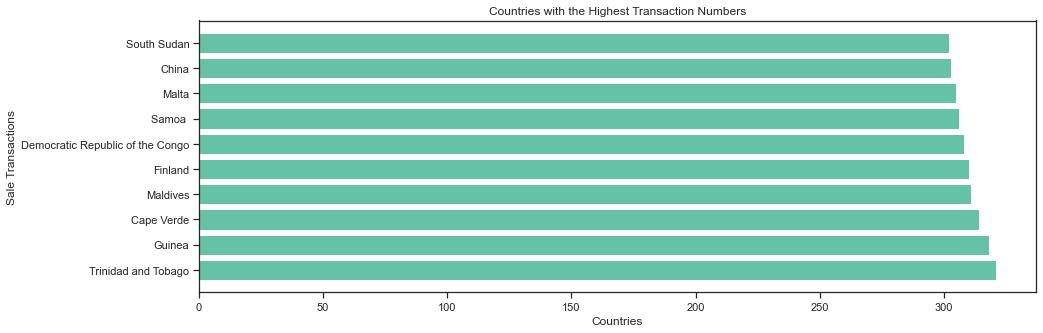

In [268]:
# Using matplotlib to create a barplot of the information on top 10 countries just retreived 

print("Visualization of the top 10 country transactions.\n")

plt.figure(figsize = (15,5))
plt.barh(top10.index, top10.values)
plt.title('Countries with the Highest Transaction Numbers')
plt.xlabel('Countries')
plt.ylabel('Sale Transactions')
plt.show()

## 1.2

In [287]:
# Appending all the countries listed to a new text file 
# Using a loop for more efficient writing

print("Results of top 10 to a new text file.\n")

with open("Data Samples/MM_Rankings.txt", "a+", newline='') as writer:
    writer.write("Countries Most Sale Transactions:")
    writer.write('\n')
    for k, v in top10.iteritems():
        writer.write(str(k))
        writer.write(":")
        writer.write(' ')
        writer.write(str(v))
        writer.write('\n')
    writer.write("The country we should build our shipping center is Cape Verde because it has the most amount of sales after the countries we already have shipping centers in\n")

Results of top 10 to a new text file.



## 2.1

In [306]:
# Using variable to get value counts from sales channel and printing it 

print("Amount of online and offline orders we have:\n")

salesChan = mmSalesDF['Sales Channel'].value_counts()
print(salesChan)

Amount of online and offline orders we have:

Online     30183
Offline    19788
Name: Sales Channel, dtype: int64


## 2.2

In [271]:
# Another value_counts function for the order priority data

print("Amount of order priority types we have:\n")

ordPri = mmSalesDF['Order Priority'].value_counts()
print(ordPri)

Amount of order priority types we have:

M    19881
H    15094
L     9984
C     5012
Name: Order Priority, dtype: int64


## 2.3

Percentage of online and offline orders we have:



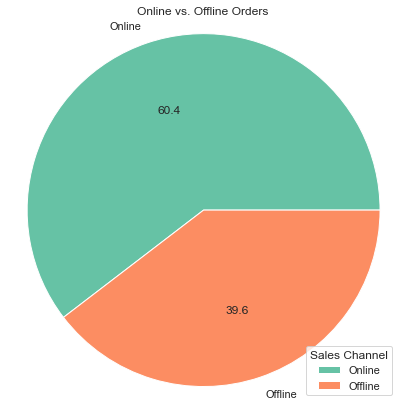

In [272]:
# Using matplotlib to create a pie chart of the sales channel data obtained

print("Percentage of online and offline orders we have:\n")

plt.figure(figsize=(7,7)) 
plt.pie(salesChan, labels = salesChan.index, autopct = '%.1f')
plt.title('Online vs. Offline Orders')
plt.axis('equal')
plt.legend(loc=4, title='Sales Channel')
plt.show()

Percentage of order priority types we have:



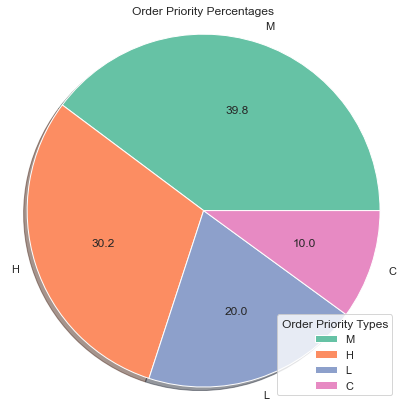

In [273]:
# Using matplotlib to create a pie chart visual of the order priority data obtained

print("Percentage of order priority types we have:\n")

plt.figure(figsize=(7,7)) 
plt.pie(ordPri, labels = ordPri.index, shadow=True, autopct = '%.1f')
plt.title('Order Priority Percentages')
plt.axis('equal')
plt.legend(loc=4, title='Order Priority Types')
plt.show()

## 2.4

In [288]:
# Implementing a for loop for appending to the rankings file

with open("Data Samples/MM_Rankings.txt", "a+", newline='') as writer:
    writer.write("\nSales Channels:")
    writer.write('\n')
    for k, v in salesChan.iteritems():
        writer.write(str(k))
        writer.write(":")
        writer.write(' ')
        writer.write(str(v))
        writer.write('\n')
    writer.write("We do more online sales.\n")

In [289]:
# Trying out a new function instead of a loop for appending to the rankings text file 

def AddTxt(orders):
    with open("Data Samples/MM_Rankings.txt", "a+", newline='') as writer:
        writer.write("\n")
        writer.write(orders)
        
ordPri = ('M: 19881\nH: 15094\nL: 9984\nC: 5012\nWe do more M order priorities.\n')


AddTxt(ordPri)

## 3.1

Total profits by item type.



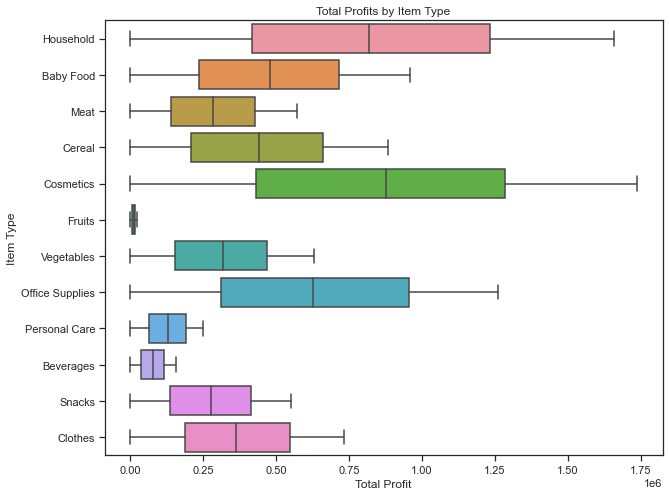

In [276]:
# Grouping two of the dataframe elements to create a boxplot that bases one column of data with another
# Using matplotlib for chart elements and seaborn to create the boxplots

print("Total profits by item type.\n")

plt.figure(figsize=(10,8))
plt.title('Total Profits by Item Type')
ax = sns.boxplot(x = 'Total Profit', y = 'Item Type', data = mmSalesDF)

## 3.2

In [277]:
# Using .groupby() function and .sum() to connect the two columns above and find the sum based on the Total Profit

print("What is the sum of our total profit by each item type?\n")

totIT = mmSalesDF.groupby('Item Type')['Total Profit'].sum()
print(totIT)

What is the sum of our total profit by each item type?

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


## 3.3

Visual with percentages of our total profit by each item type.



<function matplotlib.pyplot.show(close=None, block=None)>

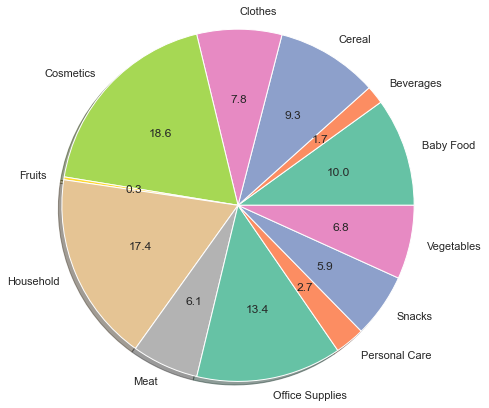

In [278]:
# Using matplotlib to create a pie chart that displays the data above

print("Visual with percentages of our total profit by each item type.\n")


totIT = mmSalesDF.groupby('Item Type')['Total Profit'].sum()

plt.figure(figsize = (7,7))
plt.pie(totIT, labels=totIT.index, shadow = True, autopct='%.1f')
plt.axis('equal')
plt.show

## 3.4

In [279]:
# Using nlargest() to find the 3 maximum values of the two columns being grouped 

print("What are the top 3 items that brought in the most profit?\n")

totIT = mmSalesDF.groupby('Item Type')['Total Profit'].sum().nlargest(3)
print(totIT)

What are the top 3 items that brought in the most profit?

Item Type
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: Total Profit, dtype: float64


## 3.5

In [290]:
# Appending our top 3 most profitable items to Marvel Market Rankings text file with the loop 

with open("Data Samples/MM_Rankings.txt", "a+", newline='') as writer:
    writer.write("\nHighest Selling Items:")
    writer.write('\n')
    for k, v in totIT.iteritems():
        writer.write(str(k))
        writer.write(":")
        writer.write(' ')
        writer.write(str(v))
        writer.write('\n')
    writer.write("We profited from Cosmetics the most with a high of 3.68408.\n")

## 3.6

The boxplots give us results for the total profit of each item type. With data from the first and third quartile, we can make conclusions on 25% and more importantly, 75% of the profit data distribution for each item being sold. The cosmetics are the most successful product type and should be placed next to personal care items from now on as those are frequently bought together and personal care item sales need to be boosted. Household items are similarly distributed as cosmetic items, whereas fruits are distributed in a very constrained manner. We must consider how this item type fits in with the rest of our categories, and promote them with more sales along with vegetables that are exhibiting more successful profit returns. It would be worthwhile to consider eliminating the sales of certain products after they are promoted or rearranged in store. Lastly, our beverages could also fall under the categories up for review as they are the second lowest in total profit returns. Perhaps the current beverages being offered are either priced unreasonably or not offered in a wide variety based on our customer demand. 

## 4.1

In [344]:
# Establishing a variable holding all columns to use for the rest of calculations
# Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit sums by using .sum function 

print("Here are the sums for each requested column of our data:\n")

columnCalcs = ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
print(mmSalesDF[columnCalcs].sum())

Here are the sums for each requested column of our data:

Units Sold        249818150.000
Unit Cost           9360768.320
Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
dtype: float64


## 4.2

In [348]:
# Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit averages by using .mean function 

print("Here are the averages for each requested column of our data:\n")
print(mmSalesDF[columnCalcs].mean())

Here are the averages for each requested column of our data:

Units Sold         4999.263
Unit Cost           187.324
Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
dtype: float64


## 4.3

In [349]:
# Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit maximums by using .max function 

print("Here are the highest data points for each requested column of our information:\n")
print(mmSalesDF[columnCalcs].max())

Here are the highest data points for each requested column of our information:

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64


## 4.4

Visual representation of total amounts for revenue, cost, and profit:



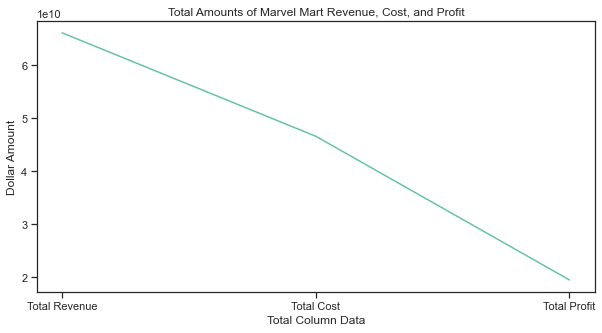

In [292]:
# Using matplotlib to create a line graph for the total sums of the data found (excluding unit cost and unit sold)
# First creating a pandas dataframe of our sum data in order to be able to graph it by index(rows) and keys(columns)

print("Visual representation of total amounts for revenue, cost, and profit:\n")

columnData = {"Total Sums": [66145004417.17, 46629032915.81, 19515971501.36]}
sumRows = pd.DataFrame(columnData, index= ['Total Revenue', 'Total Cost', 'Total Profit'])

plt.figure(figsize=(10,5))
plt.plot(sumRows.index, sumRows['Total Sums']) 
plt.title("Total Amounts of Marvel Mart Revenue, Cost, and Profit")
plt.xlabel('Total Column Data')
plt.ylabel('Dollar Amount')
plt.show()

Visual represenatation for average and maximum revenue, cost, and profit calculations:



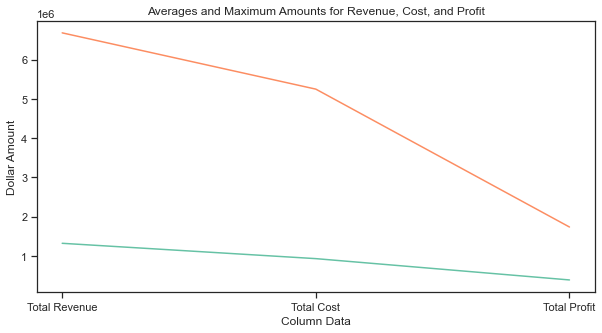

In [285]:
# Using matplotlib to create a line graph for the total averages and maximum amounts (excluding unit cost and unit sold)

print("Visual represenatation for average and maximum revenue, cost, and profit calculations:\n")

columnAvg = {"Total Avgs": [1323667.8156764843, 933121.8690002197, 390545.94667627424]}
rowsAvg = pd.DataFrame(columnAvg, index=["Total Revenue", "Total Cost", "Total Profit"])

columnMax = {"Total Maximums": [6682031.73, 5249075.04, 1738178.39]}
rowsMax = pd.DataFrame(columnMax, index=["Total Revenue", "Total Cost", "Total Profit"])

plt.figure(figsize=(10,5))
plt.plot(rowsAvg.index, rowsAvg['Total Avgs'], rowsMax.index, rowsMax['Total Maximums'])
plt.title("Averages and Maximum Amounts for Revenue, Cost, and Profit")
plt.xlabel("Column Data")
plt.ylabel("Dollar Amount")
plt.show()

## 4.5

In [350]:
# Creating a function to be able to add the multiple data calculations of the total sum, average, maximum 

def txtFileAdd(calc):
    with open("Data Samples/MM_Calc.txt", "a+", newline='') as writer:
        writer.write("\n")
        writer.write(calc)
    
sumCalc = ("Sums:\n Units Sold: 249818150.000\n Unit Cost: 9360768.320\n Total Revenue: 66145004417.170\n Total Cost: 46629032915.810\n Total Profit: 19515971501.360\n")
avgCalc = ("Averages:\n Units Sold: 4999.263\n Unit Cost: 187.324\n Total Revenue: 1323667.816\n Total Cost: 933121.869\n Total Profit: 390545.947\n")
maxCalc = ("Maximums:\n Units Sold: 10000.000\n Unit Cost: 524.960\n Total Revenue: 6682031.730\n Total Cost: 5249075.040\n Total Profit: 1738178.390")

txtFileAdd(sumCalc)
txtFileAdd(avgCalc)
txtFileAdd(maxCalc)

# Part 3: Cross-Reference Statistics

In [324]:
# Creating an empty dictionary to be able to use lists for holding the countries needed for each region
# The regions represent each dictionary key and the unique() function will ensure that each country is distinctly displayed (no duplicates)

# Opening our file first and reading the two columns needed 
RegionDF = pd.read_csv('Data Samples/MM_Sales_Clean.csv')[['Region', 'Country']]
reg = RegionDF['Region'].unique ()

countryReg = {}

# Each region column key is associated with the country column data
countryReg['North America'] = RegionDF[RegionDF.Region==('North America')]['Country'].unique()
countryReg['Europe'] = RegionDF [RegionDF.Region==('Europe')]['Country'].unique()
countryReg['Asia'] = RegionDF [RegionDF.Region==('Asia')]['Country'].unique()
countryReg['Australia and Oceania'] = RegionDF[RegionDF.Region==('Australia and Oceania')]['Country'].unique()
countryReg[' Central America and the Caribbean'] = RegionDF[RegionDF.Region==('Central America and the Caribbean')]['Country'].unique()
countryReg['Sub-Saharan Africa'] = RegionDF[RegionDF.Region==('Sub-Saharan Africa')] ['Country'].unique()
countryReg['Middle East and North Africa'] = RegionDF[RegionDF.Region==('Middle East and North Africa')]['Country'].unique()

# Using a for loop to print each unique list created which displays the countries belonging to each region
# Key function can iterate line by line through the keys we have assigned and returns the dictionary view as a list view
for key in countryReg:
    print(key, ':', countryReg[key], '\n')

North America : ['Greenland' 'United States of America' 'Canada' 'Mexico'] 

Europe : ['Iceland' 'Russia' 'Moldova ' 'Malta' 'Greece' 'Ukraine' 'Finland'
 'United Kingdom' 'San Marino' 'Kosovo' 'Hungary' 'Serbia' 'Poland'
 'Lithuania' 'Portugal' 'Georgia' 'Bulgaria' 'Austria' 'Romania' 'Denmark'
 'Luxembourg' 'Croatia' 'Sweden' 'Cyprus' 'Montenegro' 'Vatican City'
 'France' 'Netherlands' 'Estonia' 'Bosnia and Herzegovina' 'Monaco'
 'Germany' 'Slovenia' 'Ireland' 'Latvia' 'Belgium' 'Switzerland' 'Italy'
 'Belarus' 'Czech Republic' 'Liechtenstein' 'Macedonia' 'Slovakia' 'Spain'
 'Andorra' 'Albania' 'Norway' 'Armenia'] 

Asia : ['Indonesia' 'India' 'South Korea' 'Kazakhstan' 'Mongolia' 'Malaysia'
 'Singapore' 'Brunei' 'Kyrgyzstan' 'Taiwan' 'Sri Lanka' 'North Korea'
 'Cambodia' 'Tajikistan' 'Turkmenistan' 'Maldives' 'Laos' 'Myanmar'
 'Bhutan' 'Vietnam' 'Japan' 'Philippines' 'China' 'Bangladesh'
 'Uzbekistan' 'Thailand' 'Nepal'] 

Australia and Oceania : ['Tuvalu' 'Samoa ' 'Fiji' 'Marshall 

In [321]:
# To create the file, first create a pandas dataframe with the keys we have obtained 
# Pandas concat function creates a union of all the columns referred to by the axis = 1
# to_csv function finally imports the dataframe created onto a new csv file

RegionDF = [pd.DataFrame({key: countryReg[key]}) for key in countryReg.keys()]
RegionDF = pd.concat(RegionDF, axis=1)
RegionDF.to_csv('Data Samples/Country_Regions.csv', index=False)